In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon, FancyArrowPatch

def plot_fw_schema():
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']
    
    fig, ax = plt.subplots(figsize=(8, 7), dpi=150) 
    
    # 2. Définition de la forme (D)
    vertices = np.array([
        [2.5, 2.5],
        [5.5, 1.0],
        [7.5, 3.0],
        [6.5, 6.5],
        [3.5, 5.5],
        [2.0, 4.0]
    ])
    
    poly = Polygon(vertices, closed=True, facecolor='#B2EBF2', edgecolor='#006064', 
                   linewidth=2, alpha=0.4, label=r'$\mathcal{D}$')
    ax.add_patch(poly)

    # 3. Points et Mathématiques
    origin = np.array([0, 0])
    xk = np.array([4.2, 3.8]) 
    
    # Gradient (f(x)=||x||^2 -> grad = 2x). 
    grad_vector = xk - origin
    
    # Find support s_k: min <grad, s> <=> max < -grad, s >
    dots = np.dot(vertices, grad_vector) 
    sk_index = np.argmin(dots)
    sk = vertices[sk_index]

    xk_next = xk + 0.65 * (sk - xk)


    bbox_style = dict(boxstyle="round,pad=0.3", fc="white", ec="none", alpha=0.85)

    # 1. Origin
    ax.scatter(*origin, color='#D32F2F', s=150, zorder=10)
    ax.text(origin[0], origin[1]-0.6, r'$0_{\mathcal{C}}$ (Origin)', 
            fontsize=16, color='#D32F2F', ha='center', fontweight='bold', bbox=bbox_style)

    # 2. Gradient (Purple arrow)

    grad_dir = grad_vector / np.linalg.norm(grad_vector)
    arrow_grad = FancyArrowPatch(posA=xk, posB=xk + grad_dir*2.0, 
                                 arrowstyle='-|>', mutation_scale=20, 
                                 color='#7B1FA2', lw=2.5, zorder=5)
    ax.add_patch(arrow_grad)
    ax.text(xk[0] + grad_dir[0]*2.1, xk[1] + grad_dir[1]*2.1, r'$\nabla f(x_k)$', 
            fontsize=16, color='#7B1FA2', fontweight='bold', bbox=bbox_style)

    # 3. Dotted segment [xk, sk]
    ax.plot([xk[0], sk[0]], [xk[1], sk[1]], color='#1565C0', linestyle='--', lw=2.5, zorder=3)

    # 4. Point x_k
    ax.scatter(*xk, color='#1565C0', s=120, zorder=10)
    ax.text(xk[0]-0.2, xk[1]+0.4, r'$x_k$', 
            fontsize=18, color='#1565C0', fontweight='bold', ha='right', bbox=bbox_style)

    # 5. Point s_k (Support)
    ax.scatter(*sk, color='#2E7D32', s=120, zorder=10)
    ax.text(sk[0]-0.3, sk[1]-0.4, r'$s_k$ (Support)', 
            fontsize=18, color='#2E7D32', fontweight='bold', ha='center', bbox=bbox_style)

    # 6. Point x_{k+1}
    ax.scatter(*xk_next, color='#EF6C00', s=120, zorder=10)
    # We shift the text so it doesn't overlap the line
    ax.text(xk_next[0]+0.3, xk_next[1]+0.3, r'$x_{k+1}$', 
            fontsize=18, color='#EF6C00', fontweight='bold', bbox=bbox_style)

    # Contour lines (Discrete circles)
    radii = [np.linalg.norm(xk), np.linalg.norm(xk)+1.5]
    for r in radii:
        circle = plt.Circle(origin, r, color='gray', fill=False, linestyle=':', alpha=0.4, lw=1.5)
        ax.add_artist(circle)


    ax.set_xlim(-1, 9)
    ax.set_ylim(-1, 8)
    ax.set_aspect('equal')
    ax.axis('off') 

    plt.title("One iteration of Frank-Wolfe", fontsize=20, fontweight='bold', pad=10)
        
    plt.tight_layout()
    plt.show()


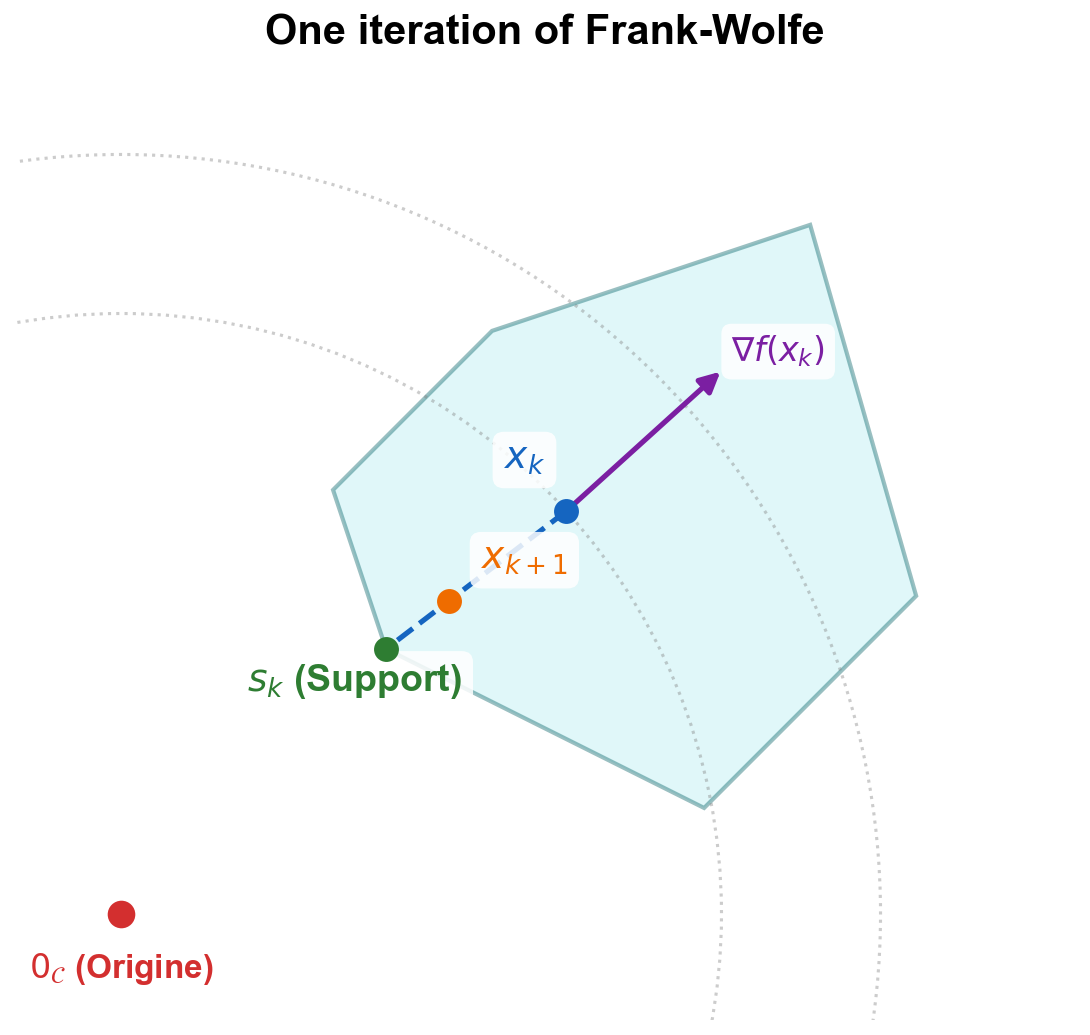

In [7]:
plot_fw_schema()

In [ ]:

def plot_fw_collision_case():
    # 1. Configuration (High Quality for Poster)
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']
    
    fig, ax = plt.subplots(figsize=(8, 7), dpi=150)
    
    # 2. Define a Convex Shape (D) that CONTAINS the origin (0,0)
    # This represents A and B in collision.
    vertices = np.array([
        [-2.0, -2.5], # Bottom Left
        [ 3.0, -1.5], # Bottom Right
        [ 4.0,  2.0], # Top Right
        [ 1.0,  4.5], # Top Peak
        [-3.0,  3.0], # Top Left
    ])
    
    # Draw the Minkowski Difference D
    poly = Polygon(vertices, closed=True, facecolor='#FFEBEE', edgecolor='#C62828', 
                   linewidth=2, alpha=0.4, label=r'$\mathcal{D}$')
    ax.add_patch(poly)

    origin = np.array([0, 0])
    
    # Current iterate x_k (Inside the shape, but not at 0 yet)
    xk = np.array([2.5, 2.5]) 
    
    # Gradient: f(x)=||x||^2 -> grad = 2x. 
    # Points from origin towards xk (and beyond).
    grad_vector = xk - origin
    
    # Linear Oracle: Find s_k maximizing <-grad, s> 
    dots = np.dot(vertices, grad_vector)
    sk_index = np.argmin(dots)
    sk = vertices[sk_index] 

    xk_next = xk + 0.7 * (sk - xk)

    # --- PLOTTING ELEMENTS ---

    bbox_style = dict(boxstyle="round,pad=0.3", fc="white", ec="none", alpha=0.9)

    # 1. Origin 
    ax.scatter(*origin, color='#D32F2F', s=180, zorder=15, marker='X')
    ax.text(origin[0] + 0.3, origin[1] - 0.4, r'$0_{\mathcal{C}}$ (Inside = Collision)', 
            fontsize=16, color='#D32F2F', fontweight='bold', bbox=bbox_style)

    # 2. Gradient (Purple)
    grad_dir = grad_vector / np.linalg.norm(grad_vector)
    arrow_grad = FancyArrowPatch(posA=xk, posB=xk + grad_dir*1.5, 
                                 arrowstyle='-|>', mutation_scale=20, 
                                 color='#7B1FA2', lw=2.5, zorder=5)
    ax.add_patch(arrow_grad)
    ax.text(xk[0] + grad_dir[0]*1.6, xk[1] + grad_dir[1]*1.6, r'$\nabla f(x_k)$', 
            fontsize=16, color='#7B1FA2', fontweight='bold', bbox=bbox_style)

    # 3. The FW Path (Segment [xk, sk])
    ax.plot([xk[0], sk[0]], [xk[1], sk[1]], color='#1565C0', linestyle='--', lw=2.5, zorder=3)

    # 4. Point x_k
    ax.scatter(*xk, color='#1565C0', s=120, zorder=10)
    ax.text(xk[0], xk[1]+0.4, r'$x_k$', 
            fontsize=18, color='#1565C0', fontweight='bold', ha='center', bbox=bbox_style)

    # 5. Support Vector s_k
    ax.scatter(*sk, color='#2E7D32', s=120, zorder=10)
    ax.text(sk[0]-0.2, sk[1]-0.6, r'$s_k$ (Support)', 
            fontsize=18, color='#2E7D32', fontweight='bold', ha='center', bbox=bbox_style)

    # 6. Next iterate x_{k+1}
    ax.scatter(*xk_next, color='#EF6C00', s=120, zorder=10)
    ax.text(xk_next[0]-0.5, xk_next[1]+0.3, r'$x_{k+1}$', 
            fontsize=18, color='#EF6C00', fontweight='bold', bbox=bbox_style)

    # Level sets (Concentric circles around origin)
    radii = [np.linalg.norm(xk), np.linalg.norm(xk_next)]
    for r in radii:
        circle = plt.Circle(origin, r, color='gray', fill=False, linestyle=':', alpha=0.5, lw=1.5)
        ax.add_artist(circle)

    # Layout
    ax.set_xlim(-4, 6)
    ax.set_ylim(-4, 6)
    ax.set_aspect('equal')
    ax.axis('off')

    plt.title("Collision : $0_{\mathcal{C}} \in \mathcal{D}$", fontsize=20, fontweight='bold', pad=10)
    
    plt.figtext(0.5, 0.05, r"$\bf{Observation}$: L'algorithme réduit la norme $\|x\|$ pour converger vers $0_{\mathcal{C}}$.", 
            ha="center", fontsize=14, bbox={"facecolor":"white", "alpha":0.9, "pad":5, "edgecolor":"gray"})

    plt.tight_layout()
    plt.show()

plot_fw_collision_case()

<>:96: SyntaxWarning: invalid escape sequence '\m'
<>:96: SyntaxWarning: invalid escape sequence '\m'
/var/folders/wg/286n42kx031b728k_3whfjp40000gn/T/ipykernel_44428/2863938469.py:96: SyntaxWarning: invalid escape sequence '\m'
  plt.title("Collision : $0_{\mathcal{C}} \in \mathcal{D}$", fontsize=20, fontweight='bold', pad=10)


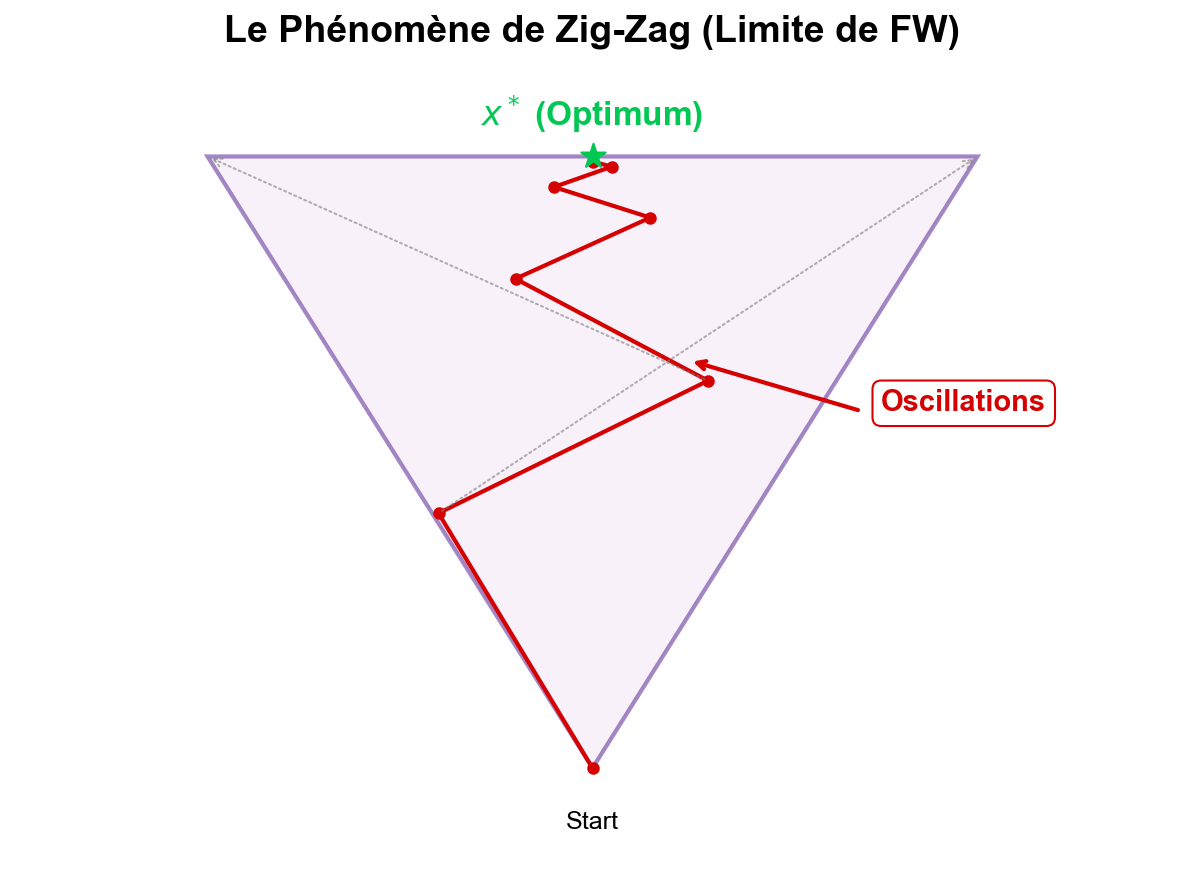

In [19]:
def plot_zigzag_phenomenon():
    # Configuration Poster
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']
    
    fig, ax = plt.subplots(figsize=(8, 6), dpi=150)
    
    # 1. ZigZag trap
    vertices = np.array([
        [-2.0, 5.0],   # Haut Gauche
        [ 2.0, 5.0],   # Haut Droite
        [ 0.0, -1.0]   # Bas (Pointe)
    ])
    
    # x* 
    x_opt = np.array([0.0, 5.0]) 
    
    # D
    poly = Polygon(vertices, closed=True, facecolor='#F3E5F5', edgecolor='#4A148C', 
                   linewidth=2, alpha=0.5, label=r'$\mathcal{D}$')
    ax.add_patch(poly)

    # 2. ZIGZAG PATH
    path_x = [0.0, -0.8, 0.6, -0.4, 0.3, -0.2, 0.1, 0.0]
    path_y = [-1.0, 1.5, 2.8, 3.8, 4.4, 4.7, 4.9, 4.95]
    
    # Trajectory plot
    ax.plot(path_x, path_y, color='#D50000', marker='o', markersize=5, 
            linestyle='-', linewidth=2, label='Trajectoire FW')

    
    # Optimum
    ax.scatter(*x_opt, color='#00C853', s=150, zorder=10, marker='*')
    ax.text(x_opt[0], x_opt[1]+0.3, r'$x^*$ (Optimum)', 
            fontsize=16, color='#00C853', fontweight='bold', ha='center',
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="none", alpha=0.8))

    # Point de départ
    ax.text(0, -1.6, 'Start', fontsize=12, ha='center', color='black')

    s1 = vertices[0] 
    s2 = vertices[1] 
    
    ax.annotate("", xy=s1, xytext=(path_x[2], path_y[2]), 
                arrowprops=dict(arrowstyle="->", color="gray", linestyle=":", alpha=0.6))
    ax.annotate("", xy=s2, xytext=(path_x[1], path_y[1]), 
                arrowprops=dict(arrowstyle="->", color="gray", linestyle=":", alpha=0.6))

    ax.text(1.5, 2.5, "Oscillations", fontsize=14, color='#D50000', fontweight='bold',
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="#D50000", alpha=1.0))
    ax.annotate("", xy=(0.5, 3.0), xytext=(1.4, 2.5),
                arrowprops=dict(arrowstyle="->", color="#D50000", lw=2))


    ax.set_xlim(-3, 3)
    ax.set_ylim(-2, 6)
    ax.axis('off')
    
    plt.title("Le Phénomène de Zig-Zag (Limite de FW)", fontsize=18, fontweight='bold')
    
    plt.tight_layout()
    plt.show()


plot_zigzag_phenomenon()

<>:67: SyntaxWarning: invalid escape sequence '\m'
<>:67: SyntaxWarning: invalid escape sequence '\m'
/var/folders/wg/286n42kx031b728k_3whfjp40000gn/T/ipykernel_44428/3782193890.py:67: SyntaxWarning: invalid escape sequence '\m'
  ax2.scatter(*origin, color='red', marker='x', s=100, label='Objectif $0_{\mathcal{C}}$')


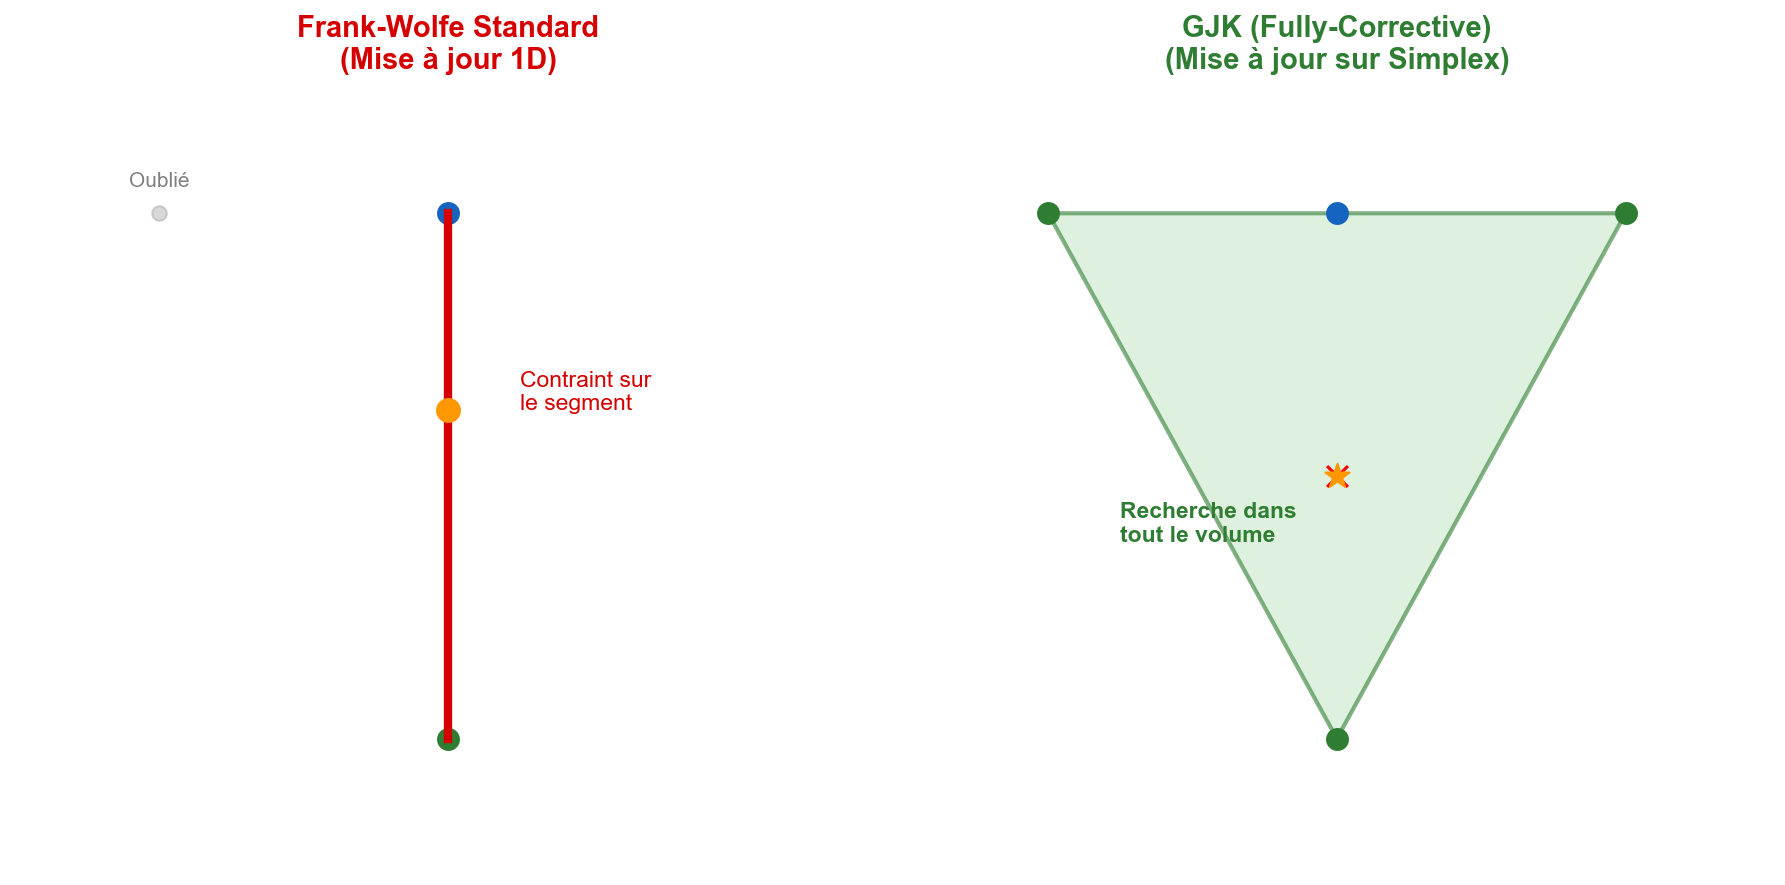

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon, FancyArrowPatch

def plot_fw_vs_gjk_comparison():
    # Config Poster
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), dpi=150)
    
    # Données communes
    # On simule 3 vecteurs supports
    s_prev = np.array([2, 5])   # Ancien support (que FW a "oublié" mais qui compose x_k)
    s_curr = np.array([6, 5])   # Autre ancien support
    
    # x_k est quelque part entre s_prev et s_curr
    xk = np.array([4, 5]) 
    
    # Le nouveau support trouvé par le gradient
    sk_new = np.array([4, 1]) 
    
    # L'origine (objectif)
    origin = np.array([4, 3])

    # --- PLOT 1: FW STANDARD (Mise à jour sur SEGMENT) ---
    
    # Zone de recherche FW : Le segment [xk, sk_new]
    ax1.plot([xk[0], sk_new[0]], [xk[1], sk_new[1]], 
             color='#D50000', lw=4, label='Espace de recherche', zorder=2)
    
    # Points
    ax1.scatter(*xk, color='#1565C0', s=100, label='$x_k$')
    ax1.scatter(*sk_new, color='#2E7D32', s=100, label='$s_k$ (Nouveau)')
    
    # Le "Fantôme" des anciens points (FW ne les utilise plus directement)
    ax1.scatter(*s_prev, color='gray', s=50, alpha=0.3)
    ax1.text(s_prev[0], s_prev[1]+0.2, "Oublié", color='gray', ha='center', fontsize=10)
    
    # x_{k+1} : Projeté sur le segment
    xk_next_fw = np.array([4, 3.5]) # Sur la ligne
    ax1.scatter(*xk_next_fw, color='#FF9800', s=120, zorder=5, label='$x_{k+1}$')
    
    # Annotations FW
    ax1.set_title("Frank-Wolfe Standard\n(Mise à jour 1D)", fontsize=14, fontweight='bold', color='#D50000')
    ax1.text(4.5, 3.5, "Contraint sur\nle segment", color='#D50000', fontsize=11)

    # --- PLOT 2: GJK / Fully-Corrective (Mise à jour sur SIMPLEX) ---
    
    # Zone de recherche GJK : Le Triangle (Simplex) formé par les supports actifs
    simplex_verts = np.array([s_prev, s_curr, sk_new])
    poly = Polygon(simplex_verts, closed=True, facecolor='#C8E6C9', edgecolor='#2E7D32', 
                   lw=2, alpha=0.6, label='Simplex (Enveloppe Convexe)')
    ax2.add_patch(poly)
    
    # Points
    ax2.scatter(*xk, color='#1565C0', s=100)
    ax2.scatter(*sk_new, color='#2E7D32', s=100)
    ax2.scatter(*s_prev, color='#2E7D32', s=100) # GJK se souvient !
    ax2.scatter(*s_curr, color='#2E7D32', s=100)
    
    # x_{k+1} : Le vrai projeté (l'origine est en (4,3), donc on va pile dessus si possible)
    xk_next_gjk = np.array([4, 3]) # L'optimum est DANS le triangle
    ax2.scatter(*xk_next_gjk, color='#FF9800', s=150, zorder=10, marker='*', label='$x_{k+1}$')
    
    # L'origine
    ax2.scatter(*origin, color='red', marker='x', s=100, label='Objectif $0_{\mathcal{C}}$')

    # Annotations GJK
    ax2.set_title("GJK (Fully-Corrective)\n(Mise à jour sur Simplex)", fontsize=14, fontweight='bold', color='#2E7D32')
    ax2.text(2.5, 2.5, "Recherche dans\ntout le volume", color='#2E7D32', fontsize=11, fontweight='bold')
    
    # Mise en forme commune
    for ax in [ax1, ax2]:
        ax.set_xlim(1, 7)
        ax.set_ylim(0, 6)
        ax.axis('off')
        # Légende simplifiée
        # ax.legend(loc='lower right', fontsize=9)

    plt.tight_layout()
    plt.show()


plot_fw_vs_gjk_comparison()

<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
/var/folders/wg/286n42kx031b728k_3whfjp40000gn/T/ipykernel_44428/3720784526.py:14: SyntaxWarning: invalid escape sequence '\m'
  alpha=0.4, lw=1.5, label='Minkowski Diff. $\mathcal{D}$', zorder=1)


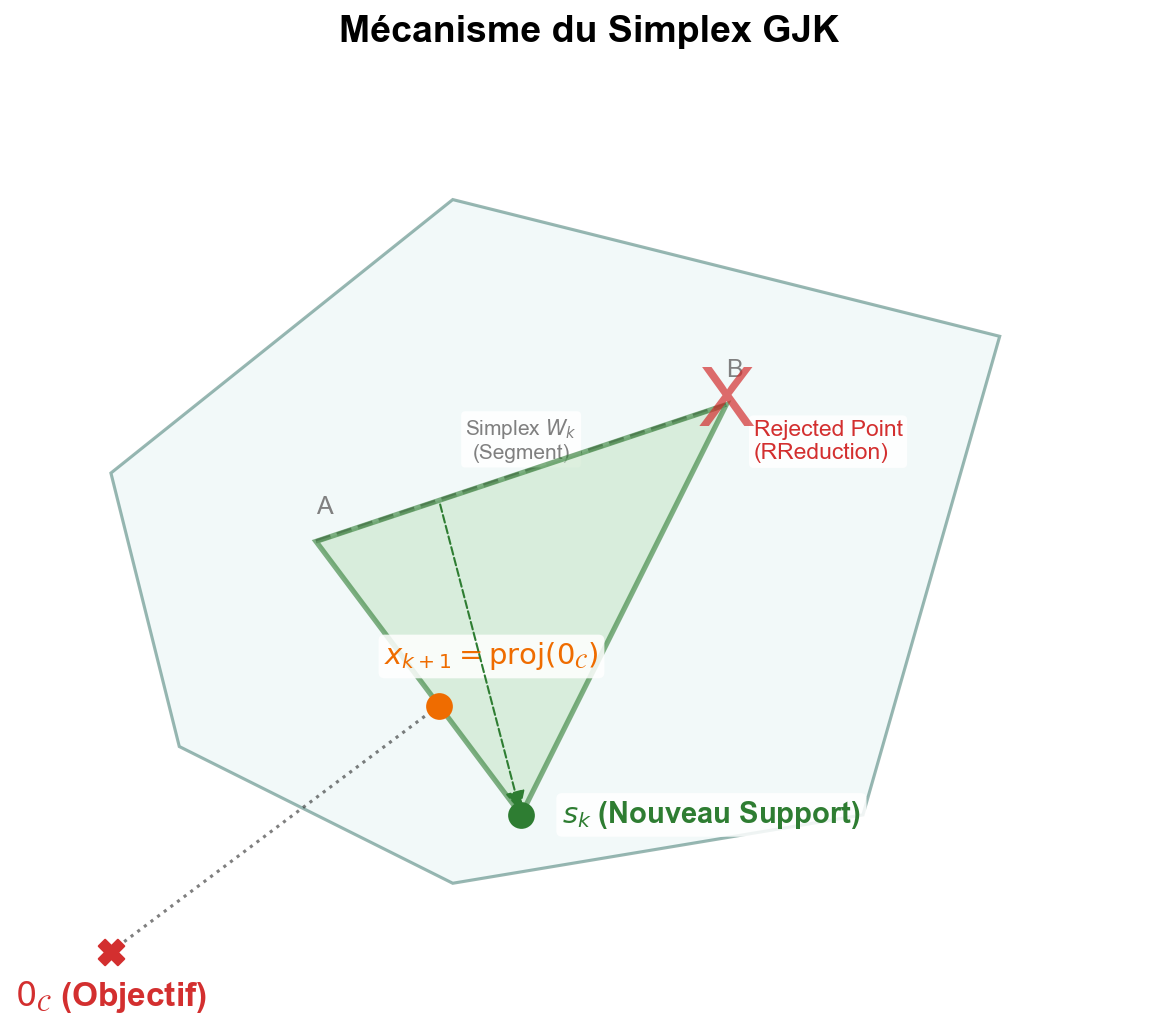

In [23]:
def plot_gjk_mechanism():
    # 1. Config Poster
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']
    
    fig, ax = plt.subplots(figsize=(9, 7), dpi=150)
    
    # 2. D
    shape_verts = np.array([
        [0.5, 4.0], [3.0, 6.0], [7.0, 5.0], 
        [6.0, 1.5], [3.0, 1.0], [1.0, 2.0]
    ])
    poly_shape = Polygon(shape_verts, closed=True, facecolor='#E0F2F1', edgecolor='#004D40', 
                         alpha=0.4, lw=1.5, label='Minkowski Diff. $\mathcal{D}$', zorder=1)
    ax.add_patch(poly_shape)

    # 3. Elements GJK
    origin = np.array([0.5, 0.5]) 
    
    # Step k : Simplex is [A,B  ]
    A = np.array([2.0, 3.5]) 
    B = np.array([5.0, 4.5]) 
    
    # POint x_k inside the simplex
    xk = A + 0.3 * (B - A) 
    
    # New support s_k found by the oracle
    sk = np.array([3.5, 1.5]) 
    
    # --- TRACÉS ---
    
    bbox_white = dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.85)

    # 1. Origin
    ax.scatter(*origin, color='#D32F2F', s=150, zorder=20, marker='X')
    ax.text(origin[0], origin[1]-0.4, r'$0_{\mathcal{C}}$ (Objectif)', 
            fontsize=16, color='#D32F2F', fontweight='bold', ha='center', bbox=bbox_white)

    # 2. Old Simplex (Segment)
    ax.plot([A[0], B[0]], [A[1], B[1]], color='gray', lw=2, linestyle='--', zorder=2)
    ax.text(A[0], A[1]+0.2, 'A', fontsize=12, color='gray')
    ax.text(B[0], B[1]+0.2, 'B', fontsize=12, color='gray')
    ax.text(3.5, 4.1, 'Simplex $W_k$\n(Segment)', color='gray', fontsize=10, ha='center', bbox=bbox_white)

    # 3. New Simplex (Triangle)
    triangle_verts = np.array([A, B, sk])
    poly_simplex = Polygon(triangle_verts, closed=True, facecolor='#C8E6C9', edgecolor='#2E7D32', 
                           lw=2.5, alpha=0.6, zorder=3, label='New Simplex')
    ax.add_patch(poly_simplex)

    # 4. New point x_{k+1}
    xk_next = A + 0.6 * (sk - A) # On the edge
    
    # Virtual projection line
    ax.plot([origin[0], xk_next[0]], [origin[1], xk_next[1]], 'k:', alpha=0.5)

    # Key points
    ax.scatter(*sk, color='#2E7D32', s=140, zorder=10)
    ax.text(sk[0]+0.3, sk[1], r'$s_k$ (Nouveau Support)', 
            fontsize=14, color='#2E7D32', fontweight='bold', va='center', bbox=bbox_white)

    ax.scatter(*xk_next, color='#EF6C00', s=140, zorder=15)
    ax.text(xk_next[0]-0.4, xk_next[1]+0.3, r'$x_{k+1} = \text{proj}(0_{\mathcal{C}})$', 
            fontsize=14, color='#EF6C00', fontweight='bold', bbox=bbox_white)

    # 5. Reduction Point B 
    ax.text(B[0], B[1], "X", fontsize=40, color='#D32F2F', ha='center', va='center', zorder=20, alpha=0.7)
    ax.text(B[0]+0.2, B[1]-0.4, "Rejected Point\n(RReduction)", fontsize=11, color='#D32F2F', bbox=bbox_white)

    # Expansion arrow
    arrow = FancyArrowPatch(posA=xk, posB=sk, arrowstyle='-|>', mutation_scale=20, 
                            color='#2E7D32', ls='dashed', zorder=5)
    ax.add_patch(arrow)

    # Layout
    ax.set_xlim(0, 8)
    ax.set_ylim(0, 7)
    ax.axis('off')
    ax.set_aspect('equal')

    plt.title("Mécanisme du Simplex GJK", fontsize=18, fontweight='bold', pad=10)
    
    plt.figtext(0.5, 0.02,s='', ha="center", fontsize=12, 
                bbox={"facecolor":"white", "alpha":0.9, "pad":8, "edgecolor":"gray"})

    plt.tight_layout()
    plt.show()



plot_gjk_mechanism()